In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
np.random.seed(9)

In [3]:
unpickled_df = pd.read_pickle("./data/processed_final_df.pkl")

In [4]:
unpickled_df.shape

(34593, 9564)

In [5]:
unpickled_df.head()


,UNITID,SATMTMID,SATMT25,SATMT75,SAT_AVG_ALL,ACTEN25,PCIP45,PCIP54,PCIP23,PCIP27,PCIP16,UGDS_NRA,UGDS_ASIAN,UGDS_UNKN,UGDS_API,UGDS,TUITIONFEE_OUT,COSTT4_A,TUITIONFEE_IN,NPT45_PUB,NPT4_75UP_PUB,CUML_DEBT_P10,CUML_DEBT_P25,DEBT_MDN,CUML_DEBT_P75,IND_DEBT_MDN,COMP_ORIG_YR2_RT,LOAN_COMP_ORIG_YR2_RT,COMP_ORIG_YR3_RT,LOAN_COMP_ORIG_YR3_RT,MALE_COMP_ORIG_YR2_RT,MD_INC_RPY_1YR_RT,HI_INC_RPY_3YR_RT,HI_INC_RPY_1YR_RT,MD_INC_RPY_5YR_RT,NOPELL_RPY_1YR_RT,pct10_earn_wne_p10,mn_earn_wne_male1_p10,mn_earn_wne_indep0_p6,mn_earn_wne_inc1_p10,pct25_earn_wne_p10,ZIP_00614-006,ZIP_00614-0067,ZIP_00614-4010,ZIP_00614-404,ZIP_00614-4045,ZIP_00674-108,ZIP_00674-1082,ZIP_00674-1091,ZIP_00680-000,ZIP_00680-0000,ZIP_00680-171,ZIP_00680-1713,ZIP_00681-110,ZIP_00681-1108,ZIP_00683-980,ZIP_00683-9801,ZIP_00715-160,ZIP_00715-1602,ZIP_00716-7733,ZIP_00716-9996,ZIP_00717-030,ZIP_00717-0306,ZIP_00717-0777,ZIP_00717-999,ZIP_00717-9997,ZIP_00732-7284,ZIP_00732-7733,ZIP_00736-9997,ZIP_00737-2230,ZIP_00738-0003,ZIP_00738-700,ZIP_00738-7003,ZIP_00778-303,ZIP_00778-3030,ZIP_00785-000,ZIP_00785-0000,ZIP_00791-4210,ZIP_00794-051,ZIP_00794-0517,ZIP_00802-999,ZIP_00802-9990,ZIP_00902-111,ZIP_00902-1112,ZIP_00902-371,ZIP_00902-3711,ZIP_00907-3373,ZIP_00918-219,ZIP_00918-2199,ZIP_00919-030,ZIP_00919-0304,ZIP_00919-129,ZIP_00919-1293,ZIP_00919-230,ZIP_00919-2303,ZIP_00926-1931,ZIP_00928-134,ZIP_00928-1345,ZIP_00931-0000,ZIP_00931-3300,ZIP_00936-5067,ZIP_00959-049,ZIP_00959-0493,ZIP_00960-0493,ZIP_00960-1725,ZIP_00960-203,ZIP_00960-2036,ZIP_00960-2037,ZIP_00960-6032,ZIP_00968-3028,ZIP_00978-090,ZIP_00978-0901,ZIP_00984-4800,ZIP_00985-098,ZIP_00985-0985,ZIP_01002-500,ZIP_01002-5000,ZIP_01002-5001,ZIP_01020-3744,ZIP_01075-148,ZIP_01075-1489,ZIP_01086-163,ZIP_01086-1630,ZIP_01105-129,ZIP_01105-1296,ZIP_01109-379,ZIP_01109-3797,ZIP_01119-268,ZIP_01119-2684,ZIP_01201-578,ZIP_01201-5786,ZIP_01230-970,ZIP_01230-9702,ZIP_01247-410,ZIP_01247-4100,ZIP_01301-973,ZIP_01301-9739,ZIP_01420-269,ZIP_01420-2697,ZIP_01440-100,ZIP_01440-1000,ZIP_01571-500,ZIP_01571-5000,ZIP_01602-259,ZIP_01602-2597,ZIP_01606-209,ZIP_01606-2092,ZIP_01609-129,ZIP_01609-1296,ZIP_01609-2165,ZIP_01609-2280,ZIP_01610-147,ZIP_01610-1477,ZIP_01610-239,ZIP_01610-2395,ZIP_01612-119,ZIP_01612-1198,ZIP_01615-007,ZIP_01615-0071,ZIP_01701-910,ZIP_01701-9101,ZIP_01730-912,ZIP_01730-9124,ZIP_01830-239,ZIP_01830-2399,ZIP_01854-510,ZIP_01854-5104,ZIP_01915-4508,ZIP_01923-084,ZIP_01923-0840,ZIP_02038-194,ZIP_02038-1941,ZIP_02062-3932,ZIP_02108-2770,ZIP_02111-1093,ZIP_02115-2703,ZIP_02115-5000,ZIP_02115-5005,ZIP_02115-5018,ZIP_02115-559,ZIP_02115-5596,ZIP_02115-588,ZIP_02115-5882,ZIP_02115-589,ZIP_02115-5896,ZIP_02115-5898,ZIP_02116-462,ZIP_02116-4624,ZIP_02120-340,ZIP_02120-3400,ZIP_02124-569,ZIP_02124-5698,ZIP_02125-339,ZIP_02125-3393,ZIP_02129-292,ZIP_02129-2925,ZIP_02129-4557,ZIP_02135-3846,ZIP_02136-403,ZIP_02136-4030,ZIP_02138-279,ZIP_02138-2790,ZIP_02139-430,ZIP_02139-4307,ZIP_02155-555,ZIP_02155-5555,ZIP_02170-299,ZIP_02170-2999,ZIP_02184-1744,ZIP_02184-4957,ZIP_02186-239,ZIP_02186-2395,ZIP_02215-259,ZIP_02215-2598,ZIP_02215-417,ZIP_02215-4176,ZIP_02302-399,ZIP_02302-3996,ZIP_02357-611,ZIP_02357-6110,ZIP_02445-729,ZIP_02445-7295,ZIP_02445-749,ZIP_02445-7496,ZIP_02452-470,ZIP_02452-4705,ZIP_02454-911,ZIP_02454-9110,ZIP_02457-031,ZIP_02457-0310,ZIP_02459-2237,ZIP_02466-271,ZIP_02466-2716,ZIP_02481-539,ZIP_02481-5399,ZIP_02481-820,ZIP_02481-8203,ZIP_02492-1200,ZIP_02493-157,ZIP_02493-1571,ZIP_02532-180,ZIP_02532-1803,ZIP_02540-2958,ZIP_02668-159,ZIP_02668-1599,ZIP_02720-739,ZIP_02720-7395,ZIP_02747-230,ZIP_02747-2300,ZIP_02809-292,ZIP_02809-2921,ZIP_02809-2923,ZIP_02818-1205,ZIP_02840-419,ZIP_02840-4192,ZIP_02886-180,ZIP_02886-1807,ZIP_02886-224,ZIP_02886-2244,ZIP_02903-2784,ZIP_02903-370,ZIP_02903-3703,ZIP_02917-128,ZIP_02917-1284,ZIP_02917-1291,ZIP_02918-0001,ZIP_03063-102,ZIP_03063-1026,ZIP_03063-130,ZIP_03063-1300,ZIP_03101-111,ZIP_03101-1113,ZIP_03102-131,ZIP_03102-1310,ZIP_03102-8518,ZIP_03103-996,ZIP_03103-9969,ZIP

In [6]:
conn = sqlite3.connect('data/database.sqlite')
cur = conn.cursor()

In [7]:
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")

table_names = cur.fetchall()
table_names

[('Scorecard',)]

In [8]:
cur.execute("""SELECT sql FROM sqlite_master WHERE type = 'table' AND name = 'Scorecard';""")
scorecard_columns = cur.fetchone()
scorecard_columns

('CREATE TABLE Scorecard (\n    Id INTEGER PRIMARY KEY,\n    UNITID INTEGER,\n    OPEID INTEGER,\n    opeid6 INTEGER,\n    INSTNM TEXT,\n    CITY TEXT,\n    STABBR TEXT,\n    ZIP INTEGER,\n    AccredAgency TEXT,\n    INSTURL TEXT,\n    NPCURL TEXT,\n    sch_deg INTEGER,\n    HCM2 INTEGER,\n    main TEXT,\n    NUMBRANCH INTEGER,\n    PREDDEG TEXT,\n    HIGHDEG TEXT,\n    CONTROL TEXT,\n    st_fips TEXT,\n    region TEXT,\n    LOCALE TEXT,\n    locale2 TEXT,\n    LATITUDE REAL,\n    LONGITUDE REAL,\n    CCBASIC TEXT,\n    CCUGPROF TEXT,\n    CCSIZSET TEXT,\n    HBCU TEXT,\n    PBI TEXT,\n    ANNHI TEXT,\n    TRIBAL TEXT,\n    AANAPII TEXT,\n    HSI TEXT,\n    NANTI TEXT,\n    MENONLY TEXT,\n    WOMENONLY TEXT,\n    RELAFFIL TEXT,\n    ADM_RATE REAL,\n    ADM_RATE_ALL REAL,\n    SATVR25 REAL,\n    SATVR75 REAL,\n    SATMT25 REAL,\n    SATMT75 REAL,\n    SATWR25 REAL,\n    SATWR75 REAL,\n    SATVRMID REAL,\n    SATMTMID REAL,\n    SATWRMID REAL,\n    ACTCM25 REAL,\n    ACTCM75 REAL,\n    A

In [9]:
instnm_df = pd.read_sql("""
SELECT Distinct Id, UNITID, INSTNM, OPEID
from Scorecard 
WHERE year BETWEEN 2002 AND 2012
AND CURROPER = "Currently certified as operating"
AND PREDDEG in ("Predominantly bachelor's-degree granting", 
"Predominantly associate's-degree granting")
;
""", conn, index_col='Id')

In [10]:
features = ['UNITID', 'OPEID', 'opeid6', 'INSTNM', 'CITY', 'STABBR', 
            'ZIP', 'AccredAgency', 'INSTURL', 'NPCURL', 'sch_deg', 'main',
            'NUMBRANCH', 'PREDDEG', 'HIGHDEG', 'CONTROL', 'st_fips', 
            'region', 'LOCALE', 'locale2'
]

In [11]:
instnm_df1.shape

(34593, 3)

In [12]:
combined_df = pd.merge(unpickled_df, instnm_df1, on='UNITID')

In [13]:
combined_df.shape

(352777, 9566)

# Cost Category

The cost category had the strongest correlation with the target variable. Below are the top colleges for each category.

# Strongest Correlation - TUITIONFEE_OUT

## Out-of-state tuition and fees

In [25]:
tuition_df = combined_df[['UNITID', 'INSTNM', 'TUITIONFEE_OUT', 'COMP_ORIG_YR4_RT']].copy()

In [35]:
tuition_df = tuition_df.groupby('UNITID').median()
tuition_df = tui()

,TUITIONFEE_OUT,COMP_ORIG_YR4_RT
UNITID,,
100654.0,8320.0,0.226845
100663.0,10732.0,0.367117
100690.0,8360.0,0.288591
100706.0,11024.0,0.324165
100724.0,8516.0,0.135227


In [49]:
tuition_df.loc[128902:128902,]

,TUITIONFEE_OUT,COMP_ORIG_YR4_RT
UNITID,,
128902.0,43990.0,0.813559


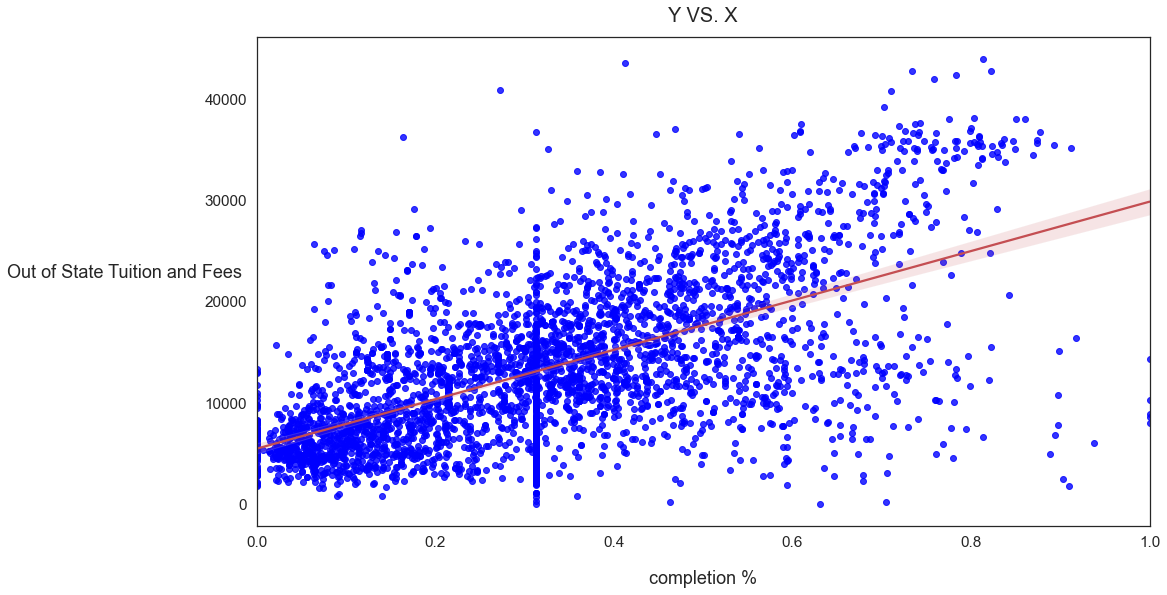

In [55]:
#Plotting 'sqft_living' vs. 'price'
sns.set_style("white")
fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
sns.set(font_scale=1.4)

sns.regplot( 
        x=tuition_df['COMP_ORIG_YR4_RT'],
        y=tuition_df['TUITIONFEE_OUT'],
        ci=99,
        scatter_kws={"color": "blue"}, line_kws={"color": "r"})

ax.set_xlabel("completion %", fontsize=18, labelpad=20)
ax.set_ylabel("Out of State Tuition and Fees", fontsize=18, labelpad=80, rotation=0)
ax.set_title("Y VS. X", fontsize=20, pad=15);

In [48]:
tuition_df.loc[155618:155618,]

,TUITIONFEE_OUT,COMP_ORIG_YR4_RT
UNITID,,
155618.0,196.0,0.704698


In [33]:
tuition_df = tuition_df.sort_values(by=['TUITIONFEE_OUT'], ascending=False)


In [34]:
tuition_df[['TUITIONFEE_OUT']].head(5)

,TUITIONFEE_OUT
UNITID,
128902.0,43990.0
234216.0,43587.0
161086.0,42820.0
160977.0,42800.0
230959.0,42428.0


In [19]:
tuition_df[['TUITIONFEE_OUT']].tail(5)

,TUITIONFEE_OUT
UNITID,
155140.0,317.5
155326.0,196.0
155618.0,196.0
197221.0,0.0
197027.0,0.0


In [44]:
list = ['Connecticut College', 'Colby College', 'Bates College', 'Middlebury College']

In [24]:
instnm_df1.loc[instnm_df1['UNITID'] == 155326]

,UNITID,INSTNM,OPEID
Id,,,
67646,155326,University of Kansas Medical Center,194802


# Second Strongest Correlation - COSTT4_A
## Average cost of attendance (academic year institutions)

The average annual total cost of attendance

In [57]:
attendance_cost_df = combined_df[['UNITID', 'INSTNM', 'COSTT4_A']].copy()
attendance_cost_df = attendance_cost_df.groupby('UNITID').median()
attendance_cost_df = attendance_cost_df.sort_values(by=['COSTT4_A'], ascending=False)
attendance_cost_df[['COSTT4_A']].head(5)

,COSTT4_A
UNITID,
433004.0,72143.0
247649.0,60025.0
195304.0,57240.5
144050.0,56392.5
179867.0,55731.5


In [64]:
attendance_list = ['American University of Health Sciences', 'Landmark College', 'Sarah Lawrence College', 'University of Chicago', 'Washington University in St Louis']
# instnm_df1.loc[instnm_df1['UNITID'] == 179867]

In [52]:
bins = [0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,1]
labels = [1,2,3,4,5,6,7,8,9]
tuition_df['COMP_ORIG_YR4_RT_binned'] = pd.cut(tuition_df['COMP_ORIG_YR4_RT'], bins,labels=labels, include_lowest = True)

In [ ]:

#Plotting average price vs. 'sqft_living'
fig, ax = plt.subplots(figsize=(15,8))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.barplot(x=tuition_df['COMP_ORIG_YR4_RT_binned'],y=df['price'], data=df)

ax.set_xlabel("Footage of the Home", fontsize=18, labelpad=20)
ax.set_ylabel("Average Price in\n USD Million", fontsize=18, labelpad=80, rotation=0)

plt.legend(labels=['1: 350~1350', '2: 1350~2350', '3: 2350~3350','4: 3350~4350','5: 4350~5350','6: 5350~6350','7: 6350~7350','8: 7350~8350', '9: 8350~9350', '10: 9350~14000'])
ax.set_title("Average Price VS. Footage of the Home",fontsize=20, pad=15)
#plt.savefig('sqft_living_vs_price.png', dpi=100, bbox_inches='tight')